In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/JAAVANIKA L/fall semester 22-23/Downloads/superstore_cleaned.csv") 

In [4]:
np.random.seed(42)
df["Inventory Days"] = np.random.randint(10, 101, size=len(df))


In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.month
df["Season"] = df["Month"].map({
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
})

C:\Users\JAAVANIKA L\AppData\Local\Temp\ipykernel_16084\41949500.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


<h1>1. 📈 Scatter Plot: Inventory Days vs Profit Margin</h1>

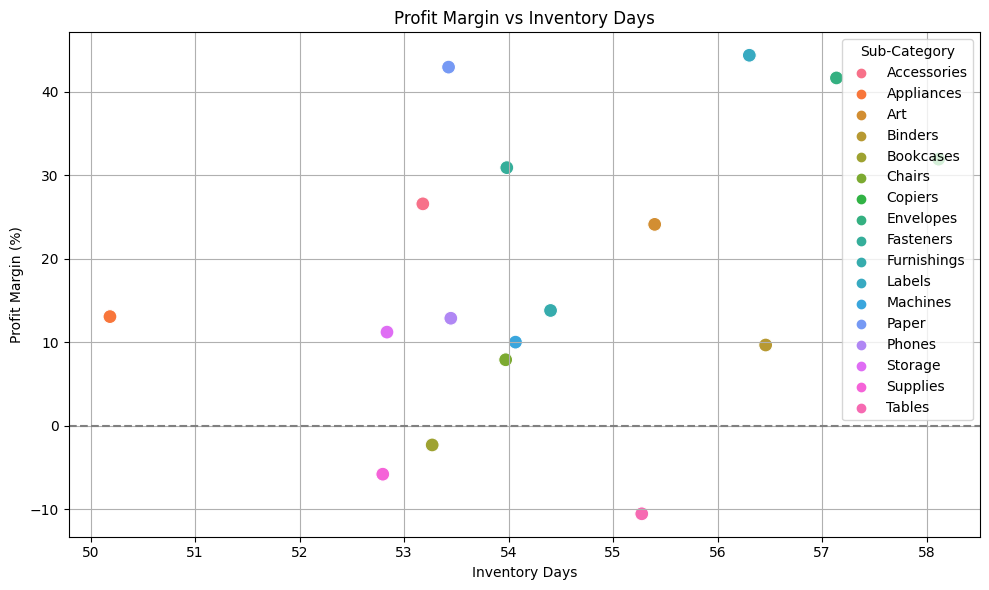

In [6]:
grouped = df.groupby("Sub-Category").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Inventory Days": "mean"
}).reset_index()
grouped["Profit Margin (%)"] = (grouped["Profit"] / grouped["Sales"]) * 100

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=grouped, x="Inventory Days", y="Profit Margin (%)", hue="Sub-Category", s=100)
plt.title("Profit Margin vs Inventory Days")
plt.axhline(0, linestyle='--', color='gray')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>2. 🔥 Heatmap: Inventory Days vs Profit Margin (Correlation Matrix)</h1>

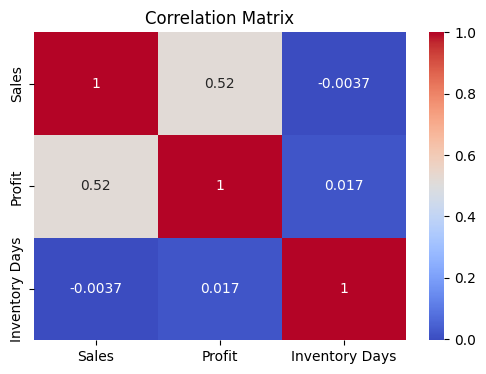

In [7]:
# Correlation between numeric columns
plt.figure(figsize=(6,4))
sns.heatmap(df[["Sales", "Profit", "Inventory Days"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


<h1>3. 📉 Bar Chart: Sub-Categories with Highest Inventory Days</h1>

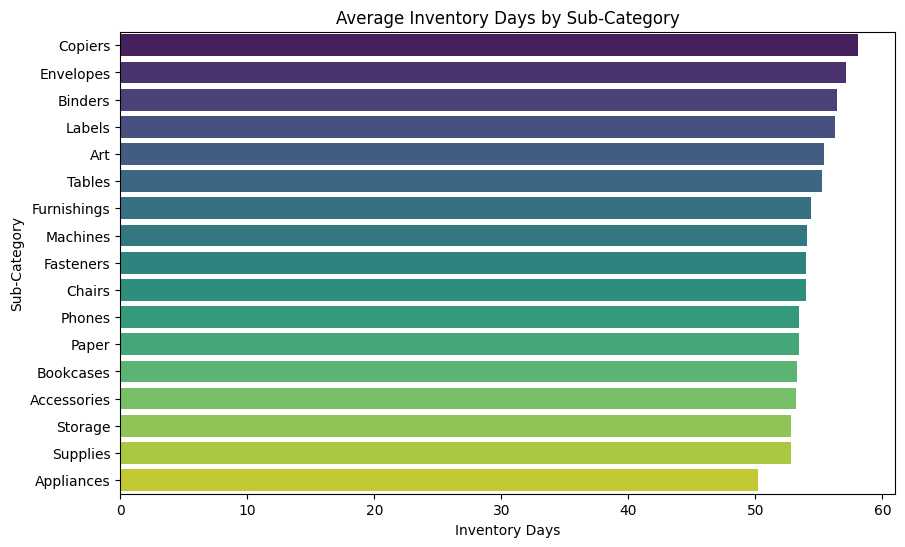

In [8]:
inv_days = df.groupby("Sub-Category")["Inventory Days"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=inv_days.values, y=inv_days.index, palette="viridis")
plt.title("Average Inventory Days by Sub-Category")
plt.xlabel("Inventory Days")
plt.ylabel("Sub-Category")
plt.show()


<h1>4. 📦 Box Plot: Inventory Days Distribution by Category</h1>

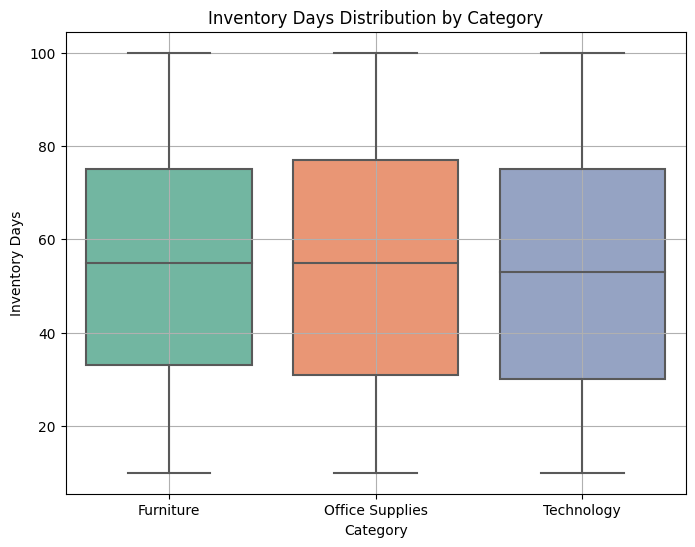

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Category", y="Inventory Days", palette="Set2")
plt.title("Inventory Days Distribution by Category")
plt.grid(True)
plt.show()


<h1>5. 🌦️ Seasonal Sales Trend (Line Plot by Season)</h1>

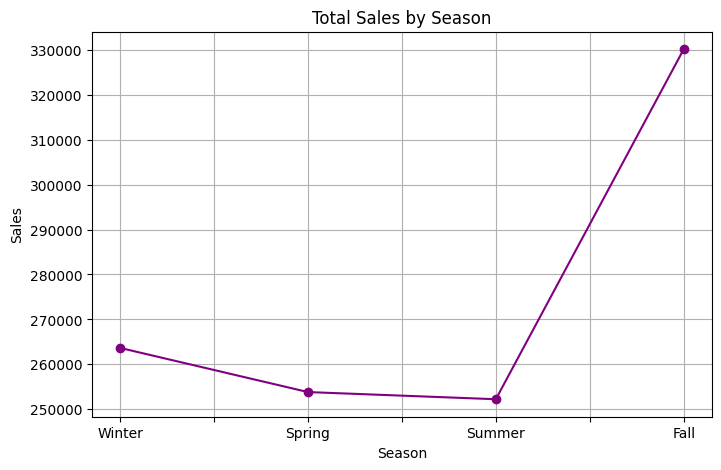

In [10]:
season_sales = df.groupby("Season")["Sales"].sum().reindex(["Winter", "Spring", "Summer", "Fall"])

plt.figure(figsize=(8,5))
season_sales.plot(kind="line", marker='o', color="purple")
plt.title("Total Sales by Season")
plt.xlabel("Season")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

<h1>6. 💸 Profitability by Season & Category (Grouped Bar Chart)</h1>

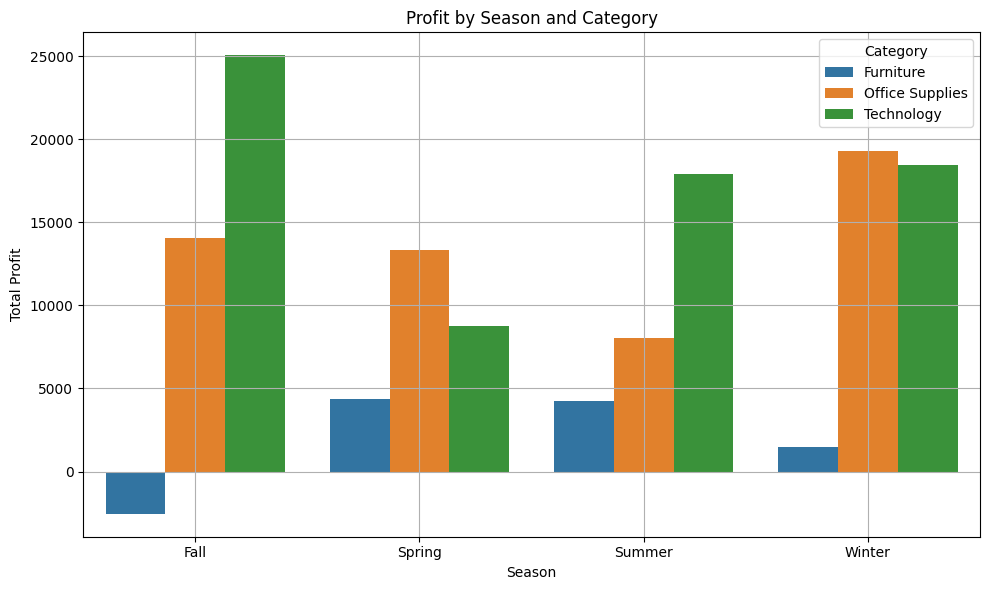

In [11]:
season_cat = df.groupby(["Season", "Category"])["Profit"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=season_cat, x="Season", y="Profit", hue="Category")
plt.title("Profit by Season and Category")
plt.ylabel("Total Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>7. 🧮 Histogram: Distribution of Profit Margins</h1>

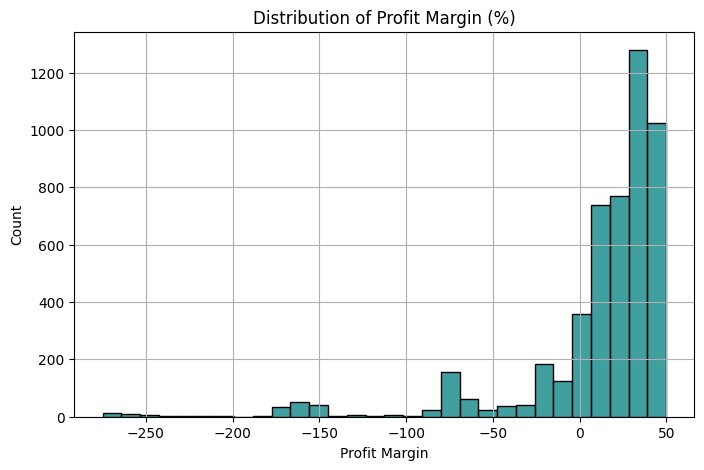

In [12]:
df["Profit Margin (%)"] = (df["Profit"] / df["Sales"]) * 100
plt.figure(figsize=(8,5))
sns.histplot(df["Profit Margin (%)"], bins=30, color="teal")
plt.title("Distribution of Profit Margin (%)")
plt.xlabel("Profit Margin")
plt.grid(True)
plt.show()

<h1>8. 🔍 Sub-Category Level Comparison (Bar Chart)</h1>

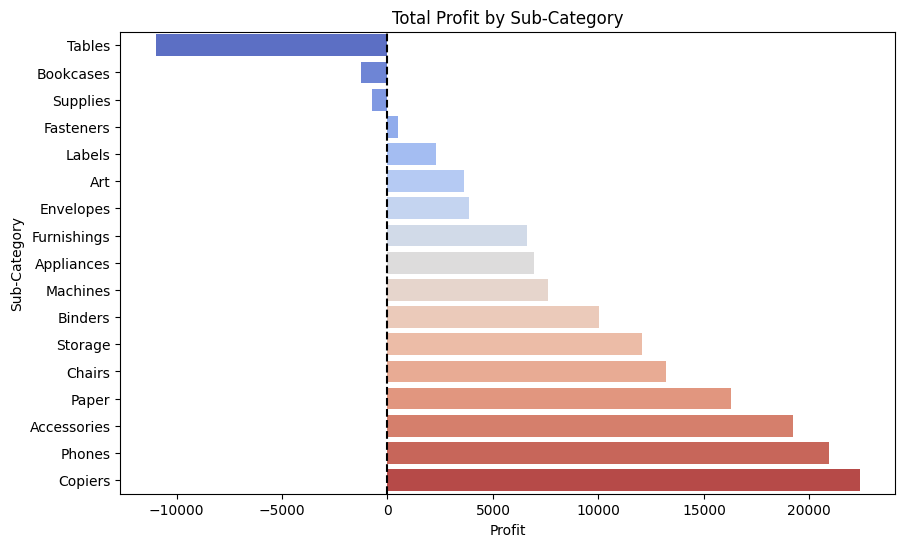

In [13]:
sub_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=sub_profit.values, y=sub_profit.index, palette="coolwarm")
plt.title("Total Profit by Sub-Category")
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.axvline(0, color="black", linestyle="--")
plt.show()